In [1]:
import numpy as np
from obspy import read_events
from obspy import read_inventory
from obspy.clients.fdsn import Client
client_wm = Client("IRIS")
from obspy.clients.iris import Client  #this is needed for gc_distaz calculation
from obspy.taup import TauPyModel
from obspy import Stream, Trace
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from obspy import UTCDateTime
from obspy.geodetics import locations2degrees,degrees2kilometers
%matplotlib inline

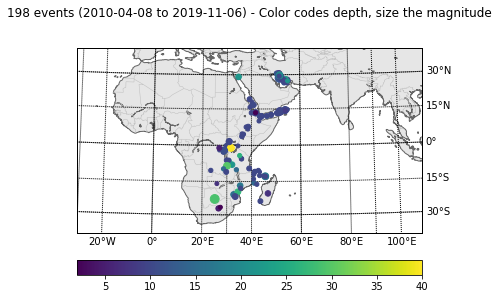

In [4]:
evid_dum='https://earthquake.usgs.gov/fdsnws/event/1/query?&starttime=2010-01-01&endtime=2020-01-02&minmagnitude=5&minlatitude=-30&maxlatitude=31&minlongitude=20&maxlongitude=55'
#inv0 = client_wm.get_stations(channel="BH*", starttime=UTCDateTime(2000, 1, 1),endtime=UTCDateTime(2019, 1, 1, 0, 5), latitude=10,level="channel", longitude=40, maxradius=1) 
cat0 = read_events(evid_dum)
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
#fig=cat0.plot(projection='local',method="basemap",fig=ax)
fig=cat0.plot(projection='local',method="basemap")

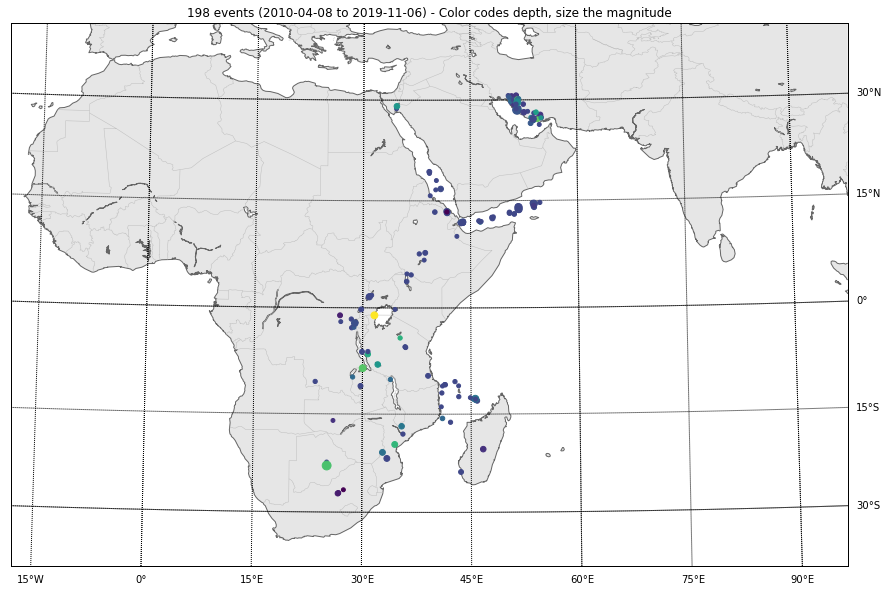

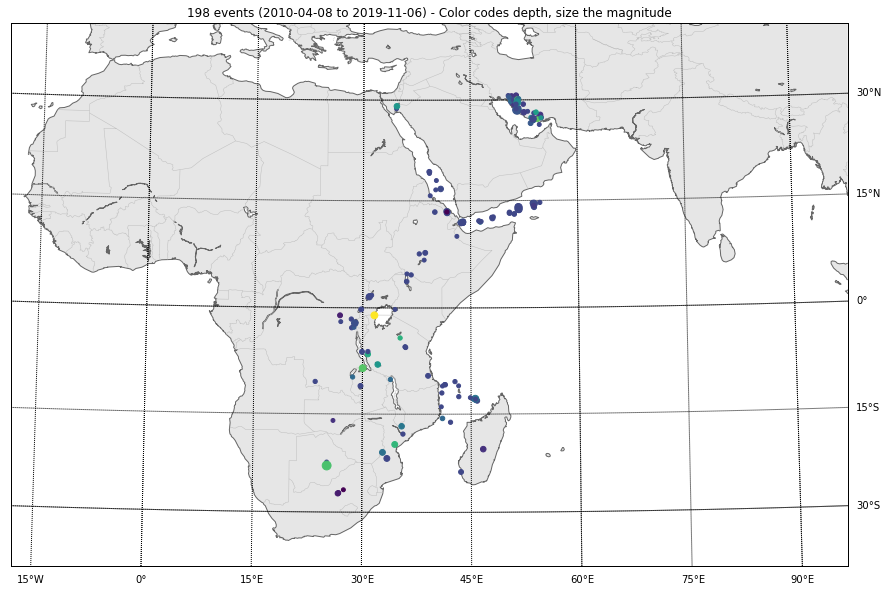

In [3]:
boundary_fh=open('PB2002_boundaries.dig.txt')
bddt_lines=list(boundary_fh)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
fig=cat0.plot(projection='local',method="basemap",fig=ax)
#fig=cat0.plot(method="basemap",fig=ax)
boundarys=[]
boundarysx=[]
boundarysy=[]
boundaryslon=[]
boundaryslat=[]
for line in bddt_lines:
    #line = line.rstrip()
    #print(line)
    
    if not line.startswith('*'):
        try:
            lonn=float(line[0:13])
            latn=float(line[14:-1])
            boundary.append([lonn,latn])
            boundaryslon.append(lonn)
            boundaryslat.append(latn)
            x,y=fig.bmap(lonn,latn)
            boundaryx.append(x)
            boundaryy.append(y)
        except:
            boundary=[]
            boundaryx=[]
            boundaryy=[]
            continue
    else:
        boundarys.append(boundary)
        boundarysx.append(boundaryx)
        boundarysy.append(boundaryy)
bounday_sel_x=[]
bounday_sel_y=[]
boundarys_sellon=[]
boundarys_sellat=[]
for i in [94,206,207,208,209,210,213,215]:
    for j,x_sel in enumerate(boundarysx[i]):
        bounday_sel_x.append(x_sel)
        bounday_sel_y.append(boundarysy[i][j])
        boundarys_sellon.append(boundarys[i][j][0])
        boundarys_sellat.append(boundarys[i][j][1])
    #fig.bmap.plot(boundarysx[i],boundarysy[i],'r-',linewidth=25.02,alpha=0.2,solid_joinstyle='round',solid_capstyle='butt')
    #fig.bmap.plot(boundarysx[i],boundarysy[i],'o-',)
fig

In [5]:

min_dis_deg=2
n=0
for i in range(len(cat0)):
#for i in range(1):
    cat_dum=cat0[i:i+1]
    dis=locations2degrees(cat_dum[0].origins[0].latitude, cat_dum[0].origins[0].longitude, boundarys_sellat, boundarys_sellon)
    mindis=np.min(dis)
    if mindis<min_dis_deg:
        n=n+1
        if n==1:
            cat_sel=cat_dum
        else:
            cat_sel+=cat_dum

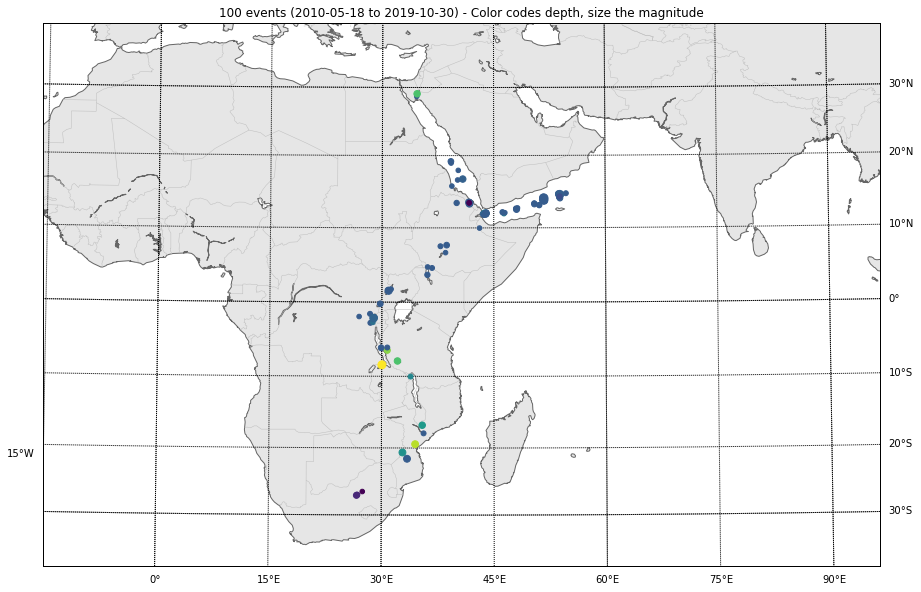

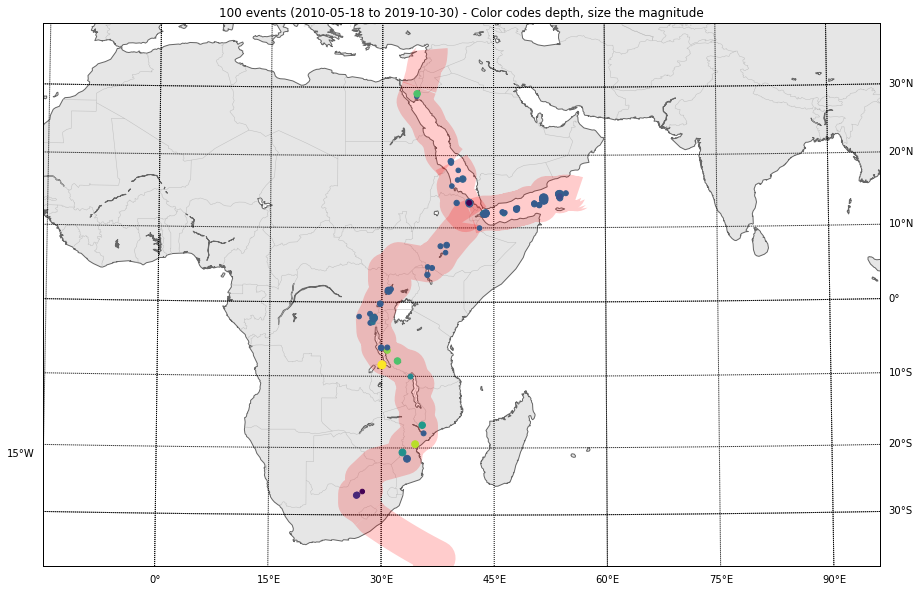

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
fig=cat_sel.plot(projection='local',method="basemap",fig=ax)
boundarysx=[]
boundarysy=[]
for line in bddt_lines:
    #line = line.rstrip()
    #print(line)
    
    if not line.startswith('*'):
        try:
            lonn=float(line[0:13])
            latn=float(line[14:-1])
            x,y=fig.bmap(lonn,latn)
            boundaryx.append(x)
            boundaryy.append(y)
        except:
            #boundary=[]
            boundaryx=[]
            boundaryy=[]
            continue
    else:
        boundarysx.append(boundaryx)
        boundarysy.append(boundaryy)
#for i in [94,206,207,208,209,210,213,215]:
for i in [94,208,209,210,213,215]:
    fig.bmap.plot(boundarysx[i],boundarysy[i],'r-',linewidth=35,alpha=0.2,solid_joinstyle='round',solid_capstyle='butt')
    #fig.bmap.plot(boundarysx[i],boundarysy[i],'o-',)
fig 